# Natural Language Processing - Text Classification

### Ziv Attias


In [1]:
import os

import pandas as pd

# Load the emotion analysis dataset
dataset_file_name = os.path.join("data", "emotion_sentiment_dataset.csv")

dataset = pd.read_csv(dataset_file_name)
dataset = dataset.head(10000)

In [2]:
dataset.head()

,Unnamed: 0,text,Emotion
0,0,i seriously hate one subject to death but now ...,hate
1,1,im so full of life i feel appalled,neutral
2,2,i sit here to write i start to dig out my feel...,neutral
3,3,ive been really angry with r and i feel like a...,anger
4,4,i feel suspicious if there is no one outside l...,neutral


([<matplotlib.patches.Wedge at 0x3132b3eb0>,
 [Text(-0.9313440604271563, 0.5853189225602204, 'neutral'),
  Text(0.585611369114235, -0.9311602033829364, 'love'),
  Text(0.7637649962577088, -0.7916205091402462, 'happiness'),
  Text(0.8844023430564791, -0.6540890578477904, 'relief'),
  Text(0.9649344825021006, -0.528111204651448, 'hate'),
  Text(1.0200603520224363, -0.41167569545925803, 'anger'),
  Text(1.054570724813592, -0.3128587322836543, 'enthusiasm'),
  Text(1.0765810458058107, -0.22577256656127917, 'sadness'),
  Text(1.090664364277533, -0.14300784766957628, 'fun'),
  Text(1.0969523899343077, -0.08182575522053251, 'worry'),
  Text(1.0991383150282659, -0.04353118924202179, 'empty'),
  Text(1.0999087507346628, -0.01416827644117519, 'surprise'),
  Text(1.0999999456902394, -0.00034566091819073, 'boredom')],
 [Text(-0.5080058511420852, 0.31926486685102934, '82.1%'),
  Text(0.319424383153219, -0.5079055654816016, '3.6%'),
  Text(0.4165990888678411, -0.43179300498558876, '3.0%'),
  Text(0.

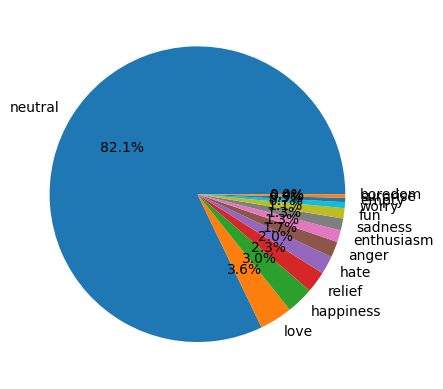

In [3]:
import matplotlib.pyplot as plt

emotion_counts = dataset["Emotion"].value_counts()

labels = emotion_counts.index
sizes = emotion_counts.values

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct="%1.1f%%")

In [4]:
# Map emotions to 'neutral' and 'non-neutral'
dataset["Emotion"] = dataset["Emotion"].apply(lambda x: 0 if x == "neutral" else 1)

In [5]:
import random

random.seed(42)
dataset["Type"] = [
    "Train" if random.random() < 0.8 else "Test" for _ in dataset["Emotion"]
]

# Split dataset into train and test sets
train_texts = dataset[dataset["Type"] == "Train"]["text"]
train_labels = dataset[dataset["Type"] == "Train"]["Emotion"]

test_texts = dataset[dataset["Type"] == "Test"]["text"]
test_labels = dataset[dataset["Type"] == "Test"]["Emotion"]

In [6]:
import numpy as np

percent_of_minority_train = np.mean(train_labels) * 100
percent_of_minority_test = np.mean(test_labels) * 100

print(f" {percent_of_minority_train:.2f}% in training set")
print(f" {percent_of_minority_test:.2f}% in testing set")

 17.71% in training set
 18.49% in testing set


In [7]:
from datasets import Dataset
from transformers import DistilBertForSequenceClassification, DistilBertTokenizer

# Prepare the dataset for the transformer
train_dataset = Dataset.from_pandas(
    pd.DataFrame({"text": train_texts, "label": train_labels})
)
test_dataset = Dataset.from_pandas(
    pd.DataFrame({"text": test_texts, "label": test_labels})
)

# Load pre-trained DistilBERT tokenizer
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")

# Load pre-trained model, based on DistilBertForSequenceClassification but fine-tuned previously in class
model = DistilBertForSequenceClassification.from_pretrained(
    os.path.join("model", "text-classification", "bi-class")
)


# Function to tokenize the dataset
def tokenize_data(example):
    return tokenizer(example["text"], padding="max_length", truncation=True)


train_dataset = train_dataset.map(tokenize_data, batched=True)
test_dataset = test_dataset.map(tokenize_data, batched=True)

model

/Users/zivattias/.local/share/virtualenvs/nlp_project-oDy93Rcp/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/zivattias/.local/share/virtualenvs/nlp_project-oDy93Rcp/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/zivattias/.local/share/virtualenvs/nlp_project-oDy93Rcp/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [8]:
from transformers import Trainer, TrainingArguments

# Define training arguments - ALREADY TRAINED @ src/model/text-classification/bi-class
# training_args = TrainingArguments(
#     output_dir="./results",
#     num_train_epochs=5,
#     logging_dir="./logs",
#     do_eval=True,
#     evaluation_strategy="epoch",
# )

# Initialize Trainer
trainer = Trainer(
    model=model,
    # args=training_args, - ALREADY TRAINED @ src/model/text-classification/bi-class
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

# Train the model - ALREADY TRAINED @ src/model/text-classification/bi-class
# trainer.train()

# Evaluate the model
results = trainer.evaluate()

print(results)

100%|██████████| 247/247 [00:43<00:00,  5.62it/s]

{'eval_loss': 0.07652145624160767, 'eval_model_preparation_time': 0.0008, 'eval_runtime': 44.6065, 'eval_samples_per_second': 44.142, 'eval_steps_per_second': 5.537}


## 1.3


In [9]:
from sklearn.metrics import precision_score, recall_score


def compute_precision_recall(predictions, references, average="binary"):
    precision = precision_score(references, predictions, average=average)
    recall = recall_score(references, predictions, average=average)
    return precision, recall

In [10]:
# Predict outputs for the training dataset
train_output = trainer.predict(train_dataset)
train_predictions = train_output.predictions.argmax(-1)
train_references = train_output.label_ids

# Predict outputs for the testing dataset
test_output = trainer.predict(test_dataset)
test_predictions = test_output.predictions.argmax(-1)
test_references = test_output.label_ids

# Compute precision and recall for the training dataset
train_precision, train_recall = compute_precision_recall(
    train_predictions, train_references
)
print(f"Training Precision: {train_precision:.4f}, Training Recall: {train_recall:.4f}")

# Compute precision and recall for the testing dataset
test_precision, test_recall = compute_precision_recall(
    test_predictions, test_references
)
print(f"Testing Precision: {test_precision:.4f}, Testing Recall: {test_recall:.4f}")

100%|██████████| 247/247 [00:45<00:00,  5.44it/s]

Training Precision: 1.0000, Training Recall: 0.9979
Testing Precision: 0.9943, Testing Recall: 0.9615


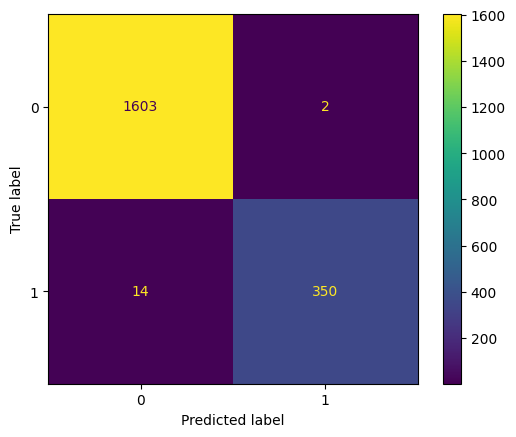

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

conf_matrix = confusion_matrix(test_references, test_predictions)

cm_display = ConfusionMatrixDisplay(conf_matrix)

cm_display.plot()

In [12]:
# Print labels and dataset
print(labels, end="\n\n")
print("Rows:", dataset.shape[0])

Index(['neutral', 'love', 'happiness', 'relief', 'hate', 'anger', 'enthusiasm',
       'sadness', 'fun', 'worry', 'empty', 'surprise', 'boredom'],
      dtype='object', name='Emotion')

Rows: 10000


# **Advanced Section**


## 1.4


In [25]:
adv_dataset = pd.read_csv(dataset_file_name)
adv_dataset = adv_dataset.head(10000)

surprises = adv_dataset[adv_dataset["Emotion"] == "surprise"]
print("Surprises rows:", surprises.shape[0])
print(
    "Surprises percentage:", f"{(surprises.shape[0] / adv_dataset.shape[0] * 100):.2f}%"
)
surprises.head()

Surprises rows: 39
Surprises percentage: 0.39%


,Unnamed: 0,text,Emotion
882,882,i feel you getting frantic close and just befo...,surprise
938,938,i feel like it s going to be something shockin...,surprise
1905,1905,i was a child this song makes me smile because...,surprise
3698,3698,ive had that vomity shocked feeling from jealo...,surprise
4352,4352,im shocked i feel my own little problems put i...,surprise


## 1.5


In [26]:
emotion_mapping = {
    "neutral": "neutral",
    "love": "positive",
    "happiness": "positive",
    "relief": "positive",
    "hate": "negative",
    "anger": "negative",
    "enthusiasm": "positive",
    "sadness": "negative",
    "fun": "positive",
    "worry": "negative",
    "empty": "negative",
    "surprise": "positive",
    "boredom": "negative",
}

adv_dataset["Class"] = adv_dataset["Emotion"].map(emotion_mapping)
adv_dataset[0:10]

,Unnamed: 0,text,Emotion,Class
0,0,i seriously hate one subject to death but now ...,hate,negative
1,1,im so full of life i feel appalled,neutral,neutral
2,2,i sit here to write i start to dig out my feel...,neutral,neutral
3,3,ive been really angry with r and i feel like a...,anger,negative
4,4,i feel suspicious if there is no one outside l...,neutral,neutral
5,5,i feel jealous becasue i wanted that kind of l...,love,positive
6,6,when a friend of mine keeps telling me morbid ...,neutral,neutral
7,7,i finally fell asleep feeling angry useless an...,worry,negative
8,8,i feel a bit annoyed and antsy in a good way,neutral,neutral
9,9,i feel like i ve regained another vital part o...,neutral,neutral


## 1.6


In [27]:
# Map emotions to 'neutral', 'positive', 'negative'
label_mapping = {"neutral": 0, "positive": 1, "negative": 2}
adv_dataset["Class"] = adv_dataset["Class"].apply(
    lambda x: label_mapping[x] if x in label_mapping else x
)

adv_dataset.head(10)

,Unnamed: 0,text,Emotion,Class
0,0,i seriously hate one subject to death but now ...,hate,2
1,1,im so full of life i feel appalled,neutral,0
2,2,i sit here to write i start to dig out my feel...,neutral,0
3,3,ive been really angry with r and i feel like a...,anger,2
4,4,i feel suspicious if there is no one outside l...,neutral,0
5,5,i feel jealous becasue i wanted that kind of l...,love,1
6,6,when a friend of mine keeps telling me morbid ...,neutral,0
7,7,i finally fell asleep feeling angry useless an...,worry,2
8,8,i feel a bit annoyed and antsy in a good way,neutral,0
9,9,i feel like i ve regained another vital part o...,neutral,0


In [28]:
from sklearn.model_selection import train_test_split

train_texts, test_texts, train_labels, test_labels = train_test_split(
    adv_dataset["text"].tolist(),
    adv_dataset["Class"].tolist(),
    test_size=0.2,
    random_state=42,
)

print("Number of test samples:", len(train_texts))
print(
    train_labels.count(0),
    "neutral",
    train_labels.count(1),
    "positive",
    train_labels.count(2),
    "negative",
    end="\n\n",
)

print("Number of test samples:", len(test_texts))
print(
    test_labels.count(0),
    "neutral",
    test_labels.count(1),
    "positive",
    test_labels.count(2),
    "negative",
)

Number of test samples: 8000
6566 neutral 959 positive 475 negative

Number of test samples: 2000
1648 neutral 212 positive 140 negative


In [29]:
adv_train_dataset = Dataset.from_pandas(
    pd.DataFrame({"text": train_texts, "label": train_labels})
)

adv_test_dataset = Dataset.from_pandas(
    pd.DataFrame({"text": test_texts, "label": test_labels})
)

adv_train_dataset = adv_train_dataset.map(tokenize_data, batched=True)
adv_test_dataset = adv_test_dataset.map(tokenize_data, batched=True)

Map: 100%|██████████| 2000/2000 [00:00<00:00, 3796.63 examples/s]


In [ ]:
from transformers import Trainer, TrainingArguments

# Define training arguments
training_args = TrainingArguments(
    output_dir="./model/text-classification/tri-class/results",
    num_train_epochs=4,
    logging_dir="./model/text-classification/tri-class/logs",
    do_eval=True,
    eval_strategy="epoch",
)


base_distilbert_model = DistilBertForSequenceClassification.from_pretrained(
    "./model/text-classification/tri-class/results/checkpoint-1500", num_labels=3
)

# Initialize Trainer
tri_class_trainer = Trainer(
    model=base_distilbert_model,
    args=training_args,
    train_dataset=adv_train_dataset,
    eval_dataset=adv_test_dataset,
)


# Train the model
tri_class_trainer.train()
tri_class_trainer.save_model("./model/tri-class/final_model")

# Evaluate the model
results = tri_class_trainer.evaluate()

print(results)

In [34]:
train_output = tri_class_trainer.predict(adv_train_dataset)
train_predictions = train_output.predictions.argmax(-1)
train_references = train_output.label_ids


test_output = tri_class_trainer.predict(adv_test_dataset)
test_predictions = test_output.predictions.argmax(-1)
test_references = test_output.label_ids

1243it [04:03,  5.11it/s]                          
100%|██████████| 250/250 [00:46<00:00,  5.42it/s]


In [36]:
train_precision, train_recall = compute_precision_recall(
    train_predictions, train_references, average="macro"
)
print(f"Training Precision: {train_precision:.4f}, Training Recall: {train_recall:.4f}")


test_precision, test_recall = compute_precision_recall(
    test_predictions, test_references, average="macro"
)
print(f"Testing Precision: {test_precision:.4f}, Testing Recall: {test_recall:.4f}")

Training Precision: 0.9897, Training Recall: 0.9845
Testing Precision: 0.9823, Testing Recall: 0.9697


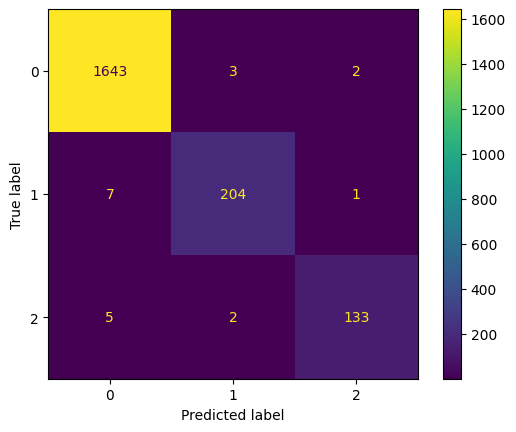

In [35]:
conf_matrix_adv = confusion_matrix(test_references, test_predictions)
cm_display = ConfusionMatrixDisplay(conf_matrix_adv)
cm_display.plot()